In [1]:
from mesh_to_sdf import mesh_to_voxels
import trimesh
import numpy as np

mesh = trimesh.load('objs/Sedan.obj')

mesh.show()

In [2]:
# SDF calculation
print('checkpoint 1')
voxels = mesh_to_voxels(mesh, 60)
print('checkpoint 2')
voxels = np.array(voxels)
print('checkpoint 3')
print(voxels.shape)
print('checkpoint 4')

checkpoint 1
checkpoint 2
checkpoint 3
(60, 60, 60)
checkpoint 4


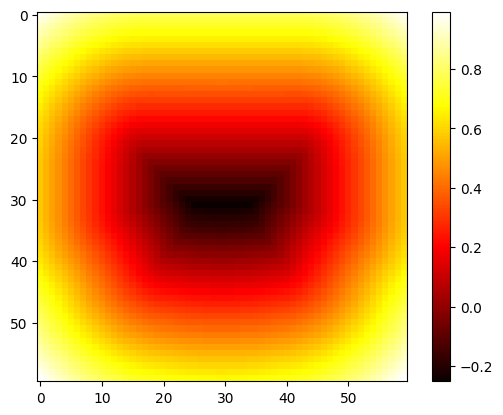

In [3]:
# SDF Field Display
import matplotlib.pyplot as plt
import numpy as np
import skimage

slice = voxels[30, :, :]
plt.imshow(slice, cmap='hot')
plt.colorbar()
plt.show()

# Reconstruct from SDF using marching cube algorithm
mc_vertices, mc_faces, mc_normals, _ = skimage.measure.marching_cubes(voxels, level=0)
mc_mesh = trimesh.Trimesh(vertices=mc_vertices, faces=mc_faces, normals=mc_normals)
mc_mesh.show()

In [4]:
# 3D DCT function
import numpy as np
from scipy.fftpack import dct, idct

def dctn(x, norm="ortho"):
    for i in range(x.ndim):
        x = dct(x, axis=i, norm=norm)
    return x

def idctn(x, norm="ortho"):
    for i in range(x.ndim):
        x = idct(x, axis=i, norm=norm)
    return x

# 3D DCT the voxels
voxels_dct = dctn(voxels)

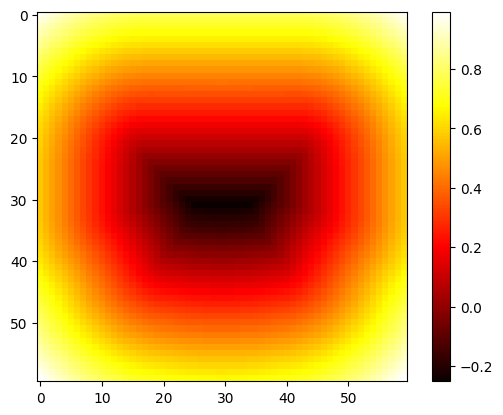

In [5]:
# Inverse the DCT
voxels_idct = idctn(voxels_dct)

slice = voxels_idct[30, :, :]
plt.imshow(slice, cmap='hot')
plt.colorbar()
plt.show()

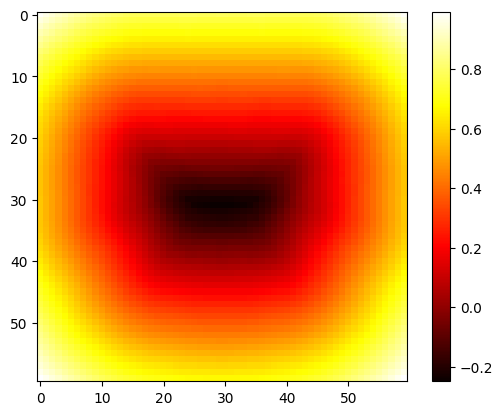

In [6]:
# Trim DCT (set zero) and try to inverse
voxels_dct_trimmed = np.array(voxels_dct)

axis_length = 25
for j in range(axis_length):
    for k in range(axis_length):
        voxels_dct_trimmed[max(axis_length - (j+k), 0):, j, k] = 0

voxels_idct_trimmed = idctn(voxels_dct_trimmed)

slice = voxels_idct_trimmed[30, :, :]
plt.imshow(slice, cmap='hot')
plt.colorbar()
plt.show()

mc_vertices, mc_faces, mc_normals, _ = skimage.measure.marching_cubes(voxels_idct_trimmed, level=0)
mc_mesh = trimesh.Trimesh(vertices=mc_vertices, faces=mc_faces, normals=mc_normals)
mc_mesh.show()